Part 1

In [1]:
l = []
with open('input_d3.txt', 'r') as f:
    for line in f:
        l.append([i.strip() for i in line.split(',')])

In [2]:
first = l[0]
second = l[1]

In [3]:
import matplotlib.pyplot as plt

In [4]:
def coordinates(l):
    coord = [(0,0)]
    for idx, i in enumerate(l):
        if i[0] == 'R':
            c = (coord[idx][0]+int(i[1:]), coord[idx][1])
        elif i[0] == 'L':
            c = (coord[idx][0]-int(i[1:]), coord[idx][1])
        elif i[0] == 'U':
            c = (coord[idx][0], coord[idx][1]+int(i[1:]))
        elif i[0] == 'D':
            c = (coord[idx][0], coord[idx][1]-int(i[1:]))
        coord.append(c)
    return coord

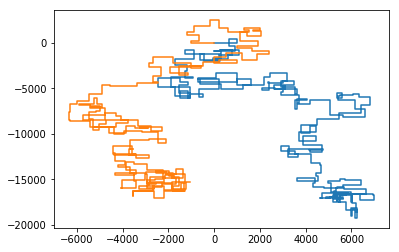

In [5]:
plt.plot(*zip(*coordinates(first)))
plt.plot(*zip(*coordinates(second)))
plt.show()

In [6]:
def intersection_place(first, second):
    l = []
    for i in range(len(first)-1):
        x1 = first[i][0]
        x2 = first[i+1][0]
        y1 = first[i][1]
        y2 = first[i+1][1]
        if x1<x2 and y1==y2:
            for j in range(len(second)-1):
                z1 = second[j][0]
                z2 = second[j+1][0]
                u1 = second[j][1]
                u2 = second[j+1][1]
                if z1==z2 and z1<x2 and z1>x1 and ((u1<y1 and u2>y1) or (u1>y1 and u2<y1)):
                    l.append([(x1,y1), (x2,y2), (z1,u1), (z2,u2)])
        if x1>x2 and y1==y2:
            for j in range(len(second)-1):
                z1 = second[j][0]
                z2 = second[j+1][0]
                u1 = second[j][1]
                u2 = second[j+1][1]
                if z1==z2 and z1>x2 and z1<x1 and ((u1<y1 and u2>y1) or (u1>y1 and u2<y1)):
                    l.append([(x1,y1), (x2,y2), (z1,u1), (z2,u2)])
        if x1==x2 and y1<y2:
            for j in range(len(second)-1):
                z1 = second[j][0]
                z2 = second[j+1][0]
                u1 = second[j][1]
                u2 = second[j+1][1]
                if u1==u2 and u1<y2 and u1>y1 and ((z1<x1 and z2>x1) or (z1>x1 and z2<x1)):
                    l.append([(x1,y1), (x2,y2), (z1,u1), (z2,u2)])
        if x1==x2 and y1>y2:
            for j in range(len(second)-1):
                z1 = second[j][0]
                z2 = second[j+1][0]
                u1 = second[j][1]
                u2 = second[j+1][1]
                if u1==u2 and u1>y2 and u1<y1 and ((z1<x1 and z2>x1) or (z1>x1 and z2<x1)):
                    l.append([(x1,y1), (x2,y2), (z1,u1), (z2,u2)])  
    return l

def intersection_points(l):
    intersections = []
    for idx, i in enumerate(l):
        if l[idx][0][0]==l[idx][1][0]:
            intersections.append((l[idx][0][0], l[idx][2][1]))
        else:
            intersections.append((l[idx][2][0], l[idx][0][1]))
    return intersections

def distance(intersections):
    return min([sum(map(abs, el)) for el in intersections])

In [7]:
distance(intersection_points(intersection_place(coordinates(first), coordinates(second))))

1626

In [8]:
def steps(x,y,l,intersection):
    steps_count = 0
    for i, val in enumerate(l):
        if l[i][0]==x and l[i][1]==y:
            for j in range(i):
                steps_count = steps_count + abs(l[j+1][0] - l[j][0]) + abs(l[j+1][1] - l[j][1])
            return steps_count + abs(intersection[0] - l[i][0]) + abs(intersection[1] - l[i][1])
            break

In [9]:
steps_count = []
for i in range(len(intersection_place(coordinates(first), coordinates(second)))):
    intersection_point = intersection_points(intersection_place(coordinates(first), coordinates(second)))[i]
    sum1 = steps(intersection_place(coordinates(first), coordinates(second))[i][0][0], 
                intersection_place(coordinates(first), coordinates(second))[i][0][1], 
                coordinates(first), 
                intersection_point)
    sum2 = steps(intersection_place(coordinates(first), coordinates(second))[i][2][0], 
                intersection_place(coordinates(first), coordinates(second))[i][2][1], 
                coordinates(second), 
                intersection_point)
    steps_count.append(sum1+sum2)

In [10]:
min(steps_count)

27330